##### Faculdade SATC, Engenharia da Computação - Rua Pascoal Meller, 73 - CEP 88.805-380 - CP 362 - Criciúma - SC - Brasil.
# KEYSTROKE DYNAMICS: COMPARAÇÃO ENTRE ALGORITMOS DE INTELIGÊNCIA ARTIFICIAL

## Implementação Rede Neural Artificial - Keystroke Dynamics


**Davi Alberto Sala** - davi.sala@satc.edu.br <br/>
**VitorPereira Scheffer** - vitorps@windowslive.com


In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

from keystroke_dynamics import get_dados
from keystroke_dynamics import plt_learn_curve
from keystroke_dynamics import plt_confusion_matrix
%matplotlib inline

# Dados

Para desenvolvimento desse trabalho foi utilizado o [*dataset*](https://www.cs.cmu.edu/~keystroke/) publico coletado por **_Kevin Killourhy_** e **_Roy Maxion_**

O _dataset_ contem dados de 50 usuários digitando 400 vezes a senha **_.tie5Roanl_** durante 8 seções distintas.
O mesmo foi pré-processado e divido da seguinte forma:

* **[X e y]** - dataset completo, divido entre *X* atributos e *y* identificação 
* **[X_train, y_train]** - dataset de treinamento(80% do *dataset* completo), divido entre *X* atributos e *y* identificação 
* **[X_test, y_test]** - dataset de teste(20% do *dataset* completo), divido entre *X* atributos e *y* identificação
* **[y_labels]** - Identificação amigável dos usuários 



  

In [2]:
X, y, X_train, X_test, y_train, y_test, y_labels = get_dados()

# Multi-layer Perceptron classifier

A clasificação foi realizada utilizando a função **MLPClassifier** da biblioteca _scikitlearn_

```python
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(84,), learning_rate='invscaling',
       learning_rate_init=0.001, max_iter=600, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
```

In [3]:
classificador = MLPClassifier(random_state=42,hidden_layer_sizes=(84, ),max_iter=600).fit(X_train,y_train)

### Curva de aprendizado
Mostra a relação entre o tamanho do conjunto e a taxa de acerto

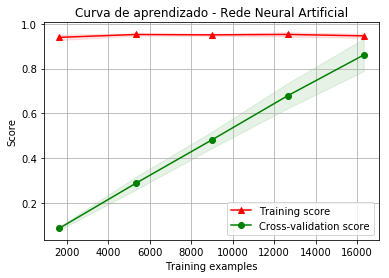

In [9]:
plt_learn_curve(MLPClassifier(random_state=42,hidden_layer_sizes=(84, ),max_iter=600,
                              activation= 'relu', learning_rate= 'invscaling', 
                              solver='adam'), "Curva de aprendizado - Rede Neural Artificial", X,y, cv=5).show()

# Resultados do treinamento

### Acurácia do modelo
Preve a saída usando dados de teste sobre o modelo aprendido

In [4]:
y_predict = classificador.predict(X_test)
model_accuracy = metrics.accuracy_score(y_test, y_predict)
print('Acurácia do modelo:',model_accuracy)

Acurácia do modelo: 0.924019607843


### Métricas de classificação

* Precisão
* Sensibilidade
* F1-Score
* Quantidade de amostras

##### Imagem demonstrando diferença entre precisão e sensibilidade
![Imagem demonstrando diferença entre precision e recall](../img/Precisionrecall.png "Olha a banana dançando!")

In [5]:
print(classification_report(y_test, y_predict, target_names=y_labels))

             precision    recall  f1-score   support

       s002       0.94      0.89      0.91        72
       s003       0.87      0.94      0.90        69
       s004       0.93      0.93      0.93        73
       s005       1.00      0.96      0.98        73
       s007       0.82      0.85      0.84        54
       s008       0.86      0.84      0.85        87
       s010       0.97      0.95      0.96        97
       s011       0.85      0.95      0.89        75
       s012       0.92      0.88      0.90        93
       s013       0.97      0.93      0.95        72
       s015       0.91      0.90      0.90        87
       s016       0.95      0.96      0.96        85
       s017       0.96      0.98      0.97        82
       s018       0.90      0.89      0.90        73
       s019       0.96      0.97      0.97        80
       s020       0.80      0.85      0.82        86
       s021       0.85      0.95      0.90        86
       s022       0.97      0.99      0.98   

### Matriz de confusão
é calculada pela função de mineração Classificações. Ela exibe a distribuição dos registros nos termos de suas classes reais e suas classes previstas. Isso indica a qualidade do modelo atual

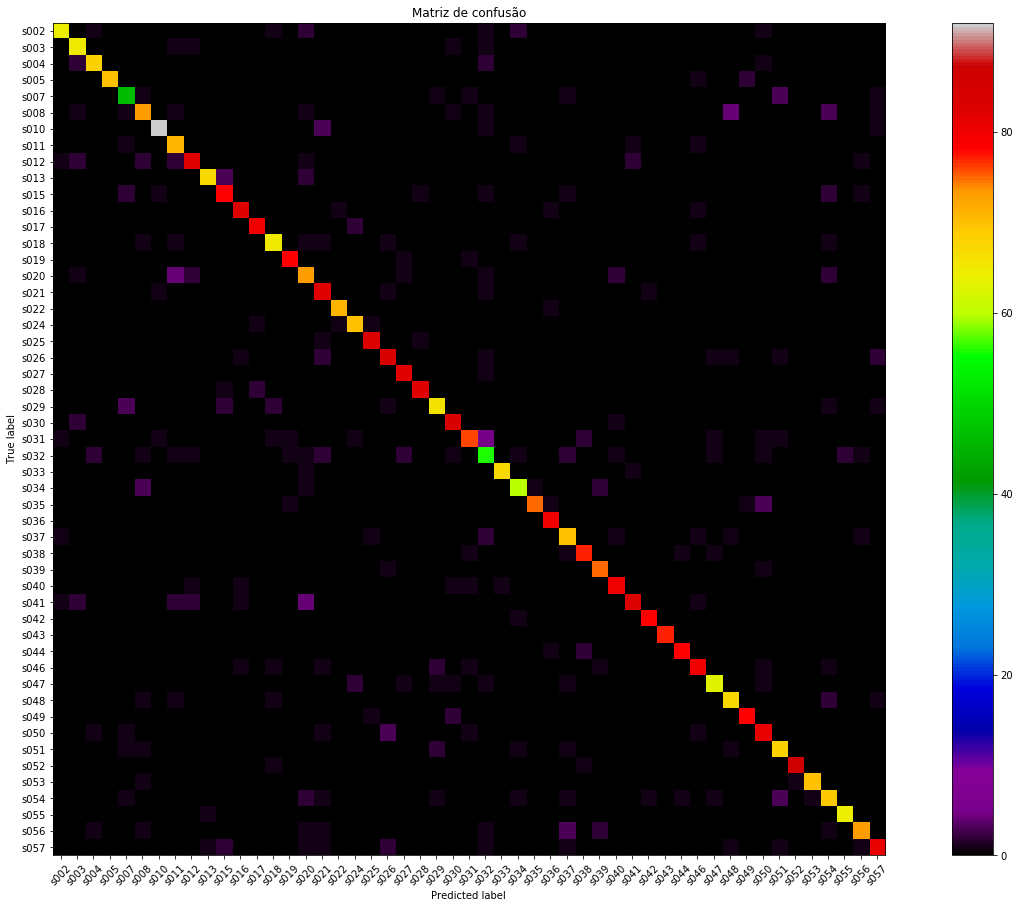

In [6]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt_confusion_matrix(cnf_matrix, classes=y_labels, normalize=False, title='Matriz de confusão',cmap=plt.cm.nipy_spectral).show()